In [1]:
import cv2
from matplotlib import pyplot as plt
image_file = "images/0.jpg"
img = cv2.imread(image_file)

In [2]:
cv2.imshow("original image", img)
cv2.waitKey(0)

2024-07-08 13:11:20.580 Python[7600:1257015] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [2]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape
    
    #What size does figure need to be in inches to fit the image
    figsize = width / float(dpi), height / float(dpi)
    
    #Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    
    #Hide spines, ticks, etc
    ax.axis('off')
    
    #Display the image
    ax.imshow(im_data, cmap='gray')
    
    plt.show()

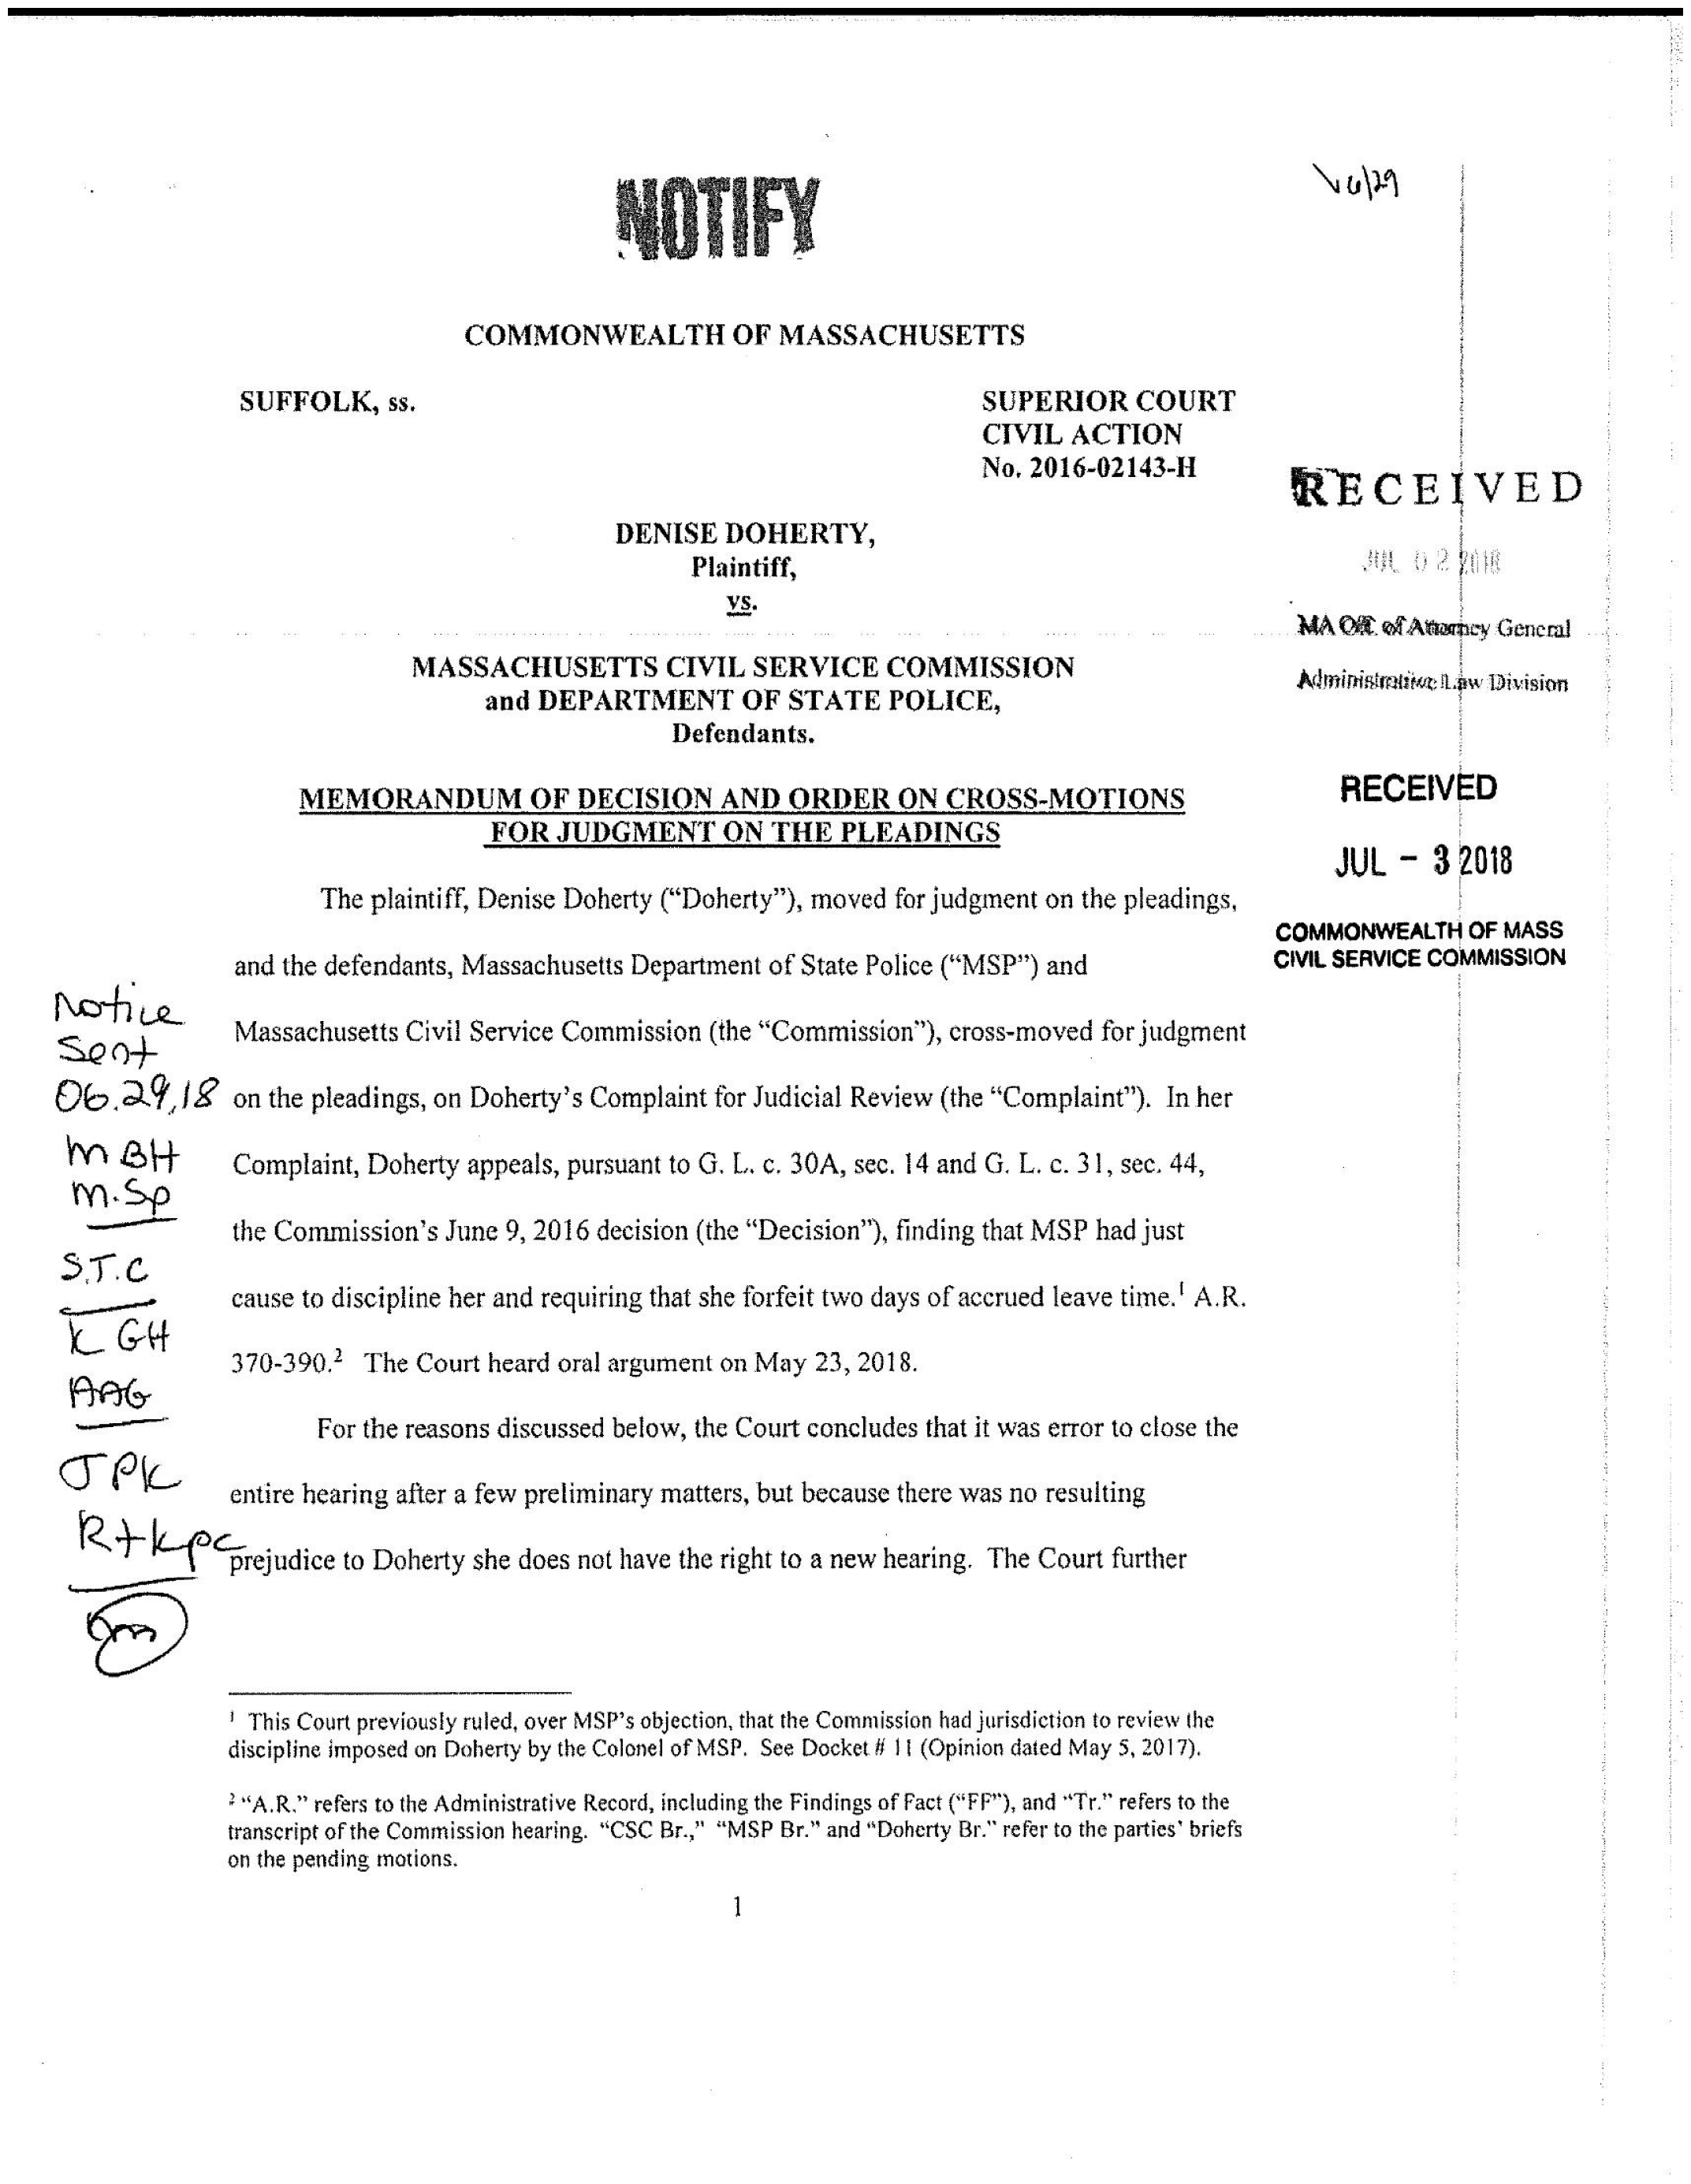

In [5]:
display(image_file)

In [3]:
# Binarization - convert image into b&w, must be in grayscale
thresh, im_bw = cv2.threshold(img, 200, 230, cv2.THRESH_BINARY) 
cv2.imwrite("images/0.jpg", im_bw)

True

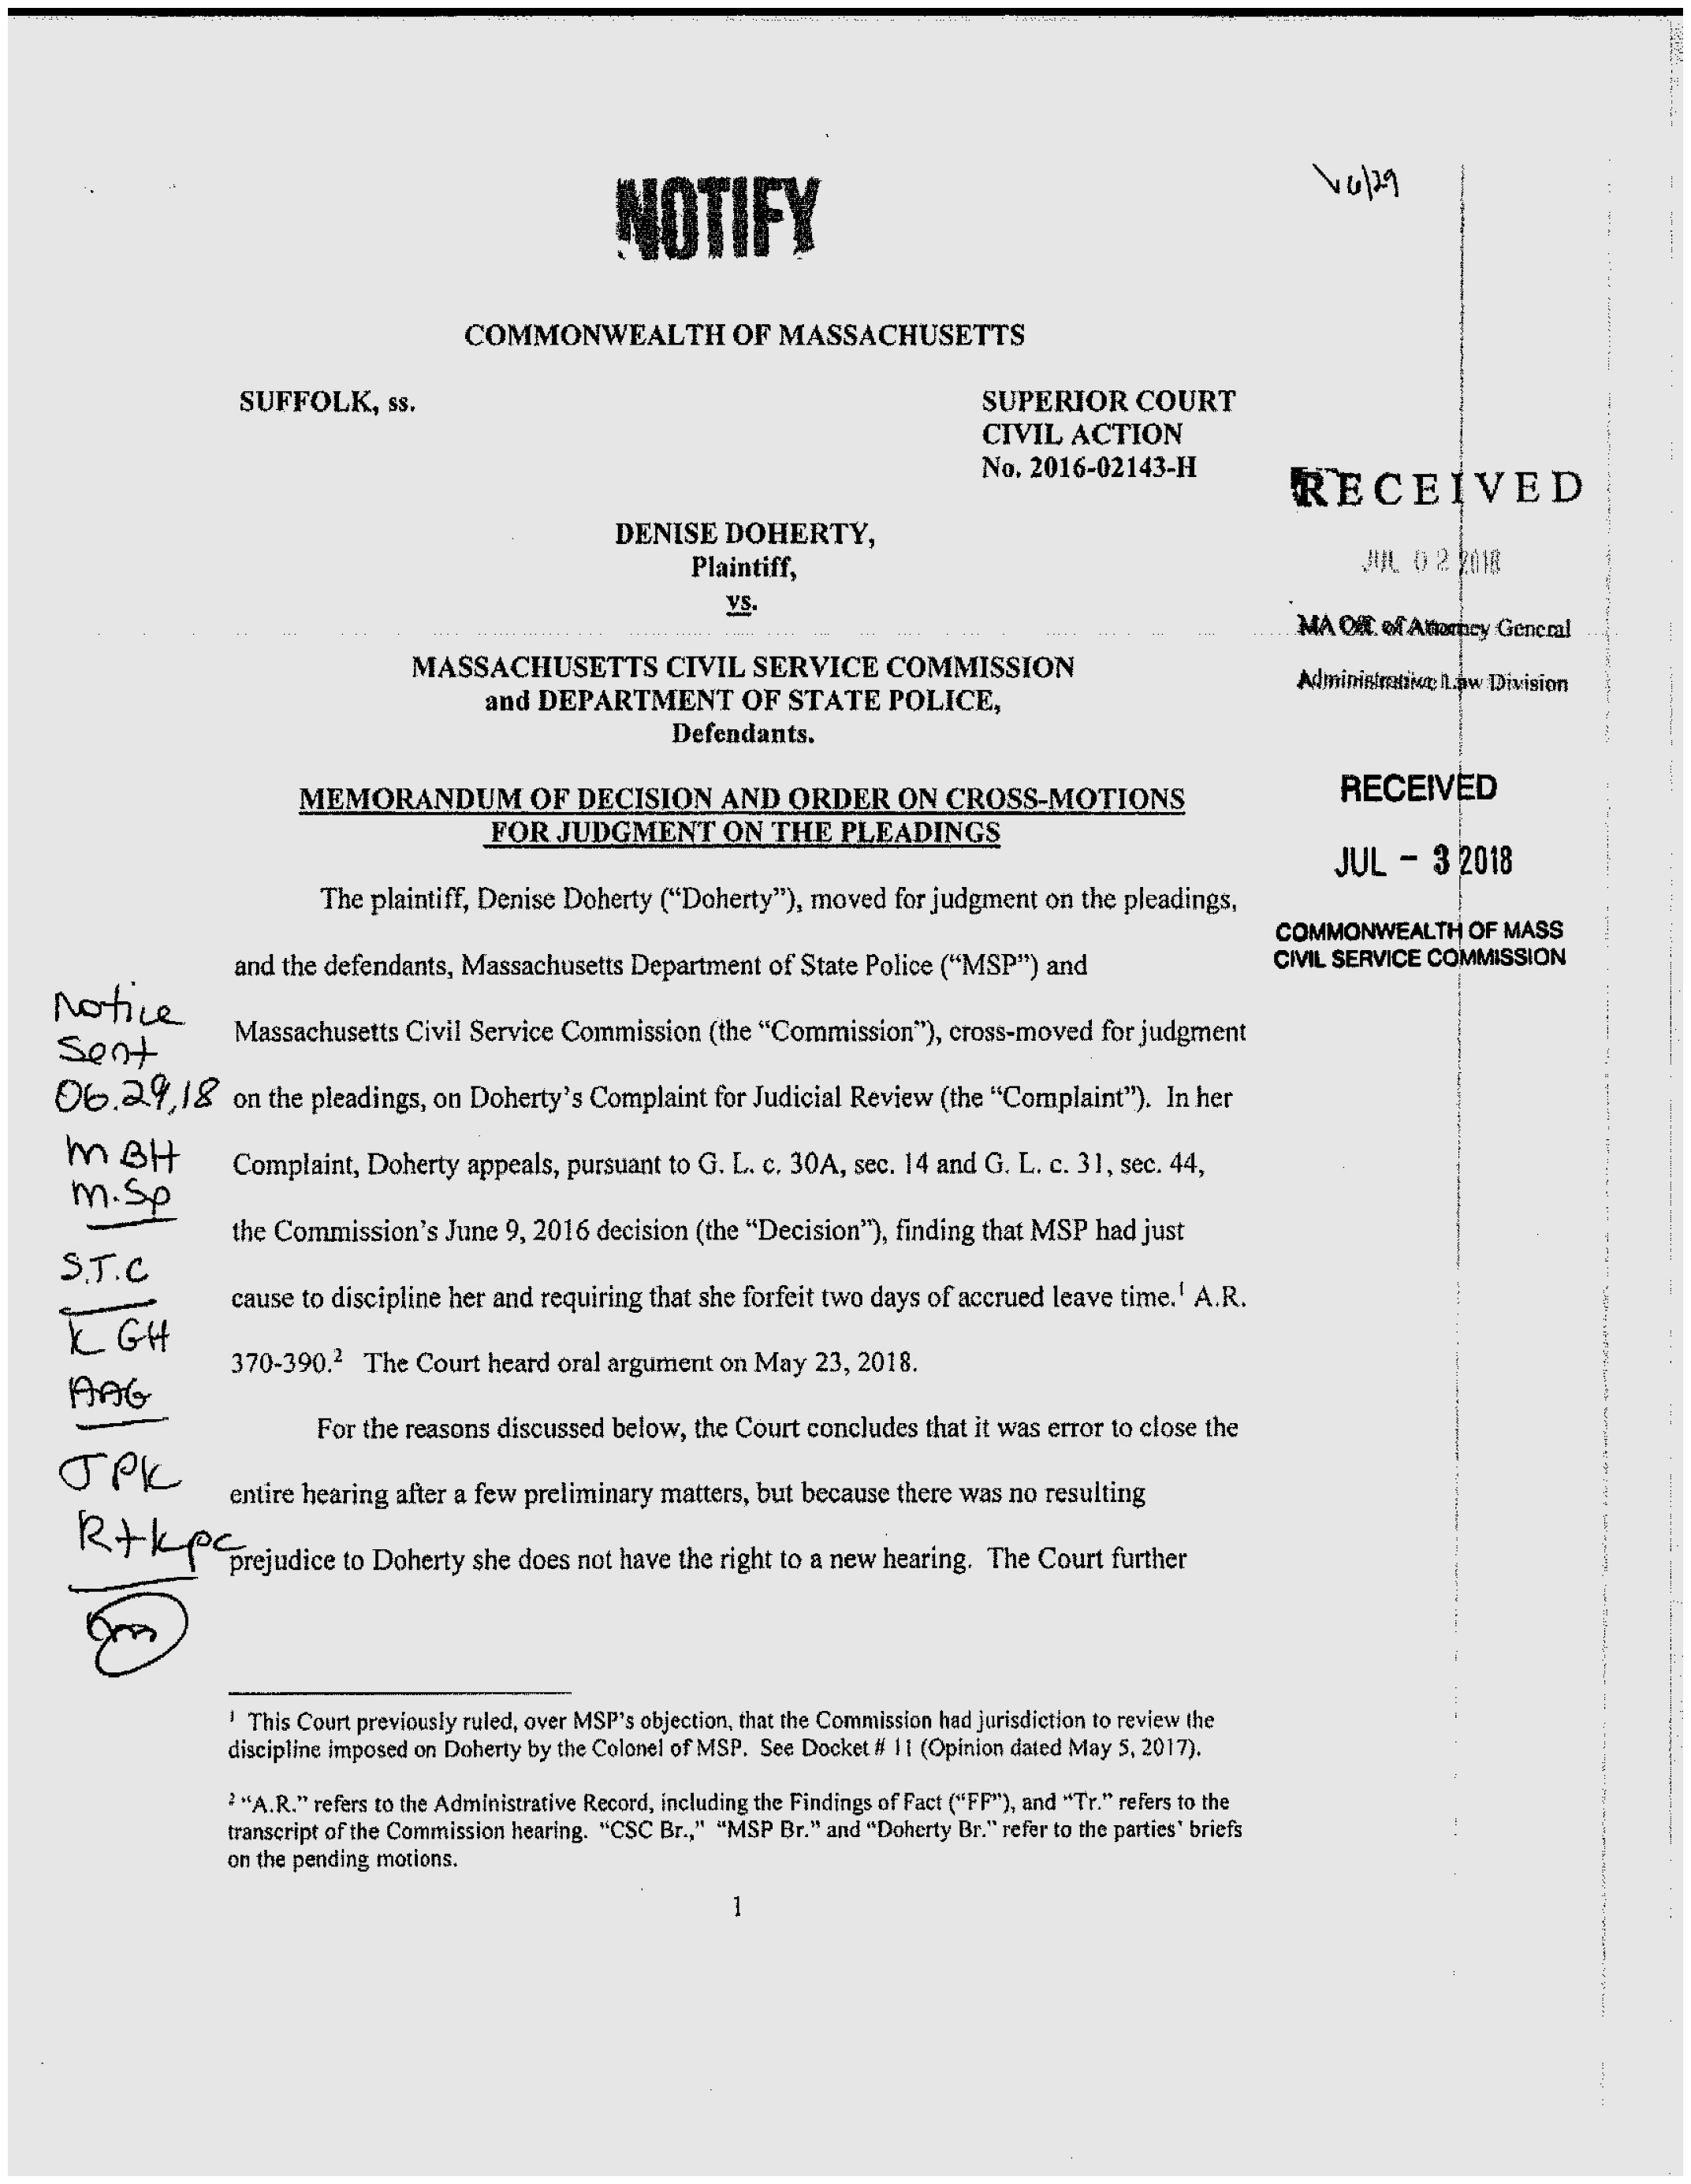

In [4]:
display("images/0.jpg")

In [5]:
# Noise removal
# check if it's okay first because you might not need it, it comes back more bold
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [6]:
no_noise = noise_removal(im_bw)
cv2.imwrite("images/no_noise0.jpg", no_noise)

True

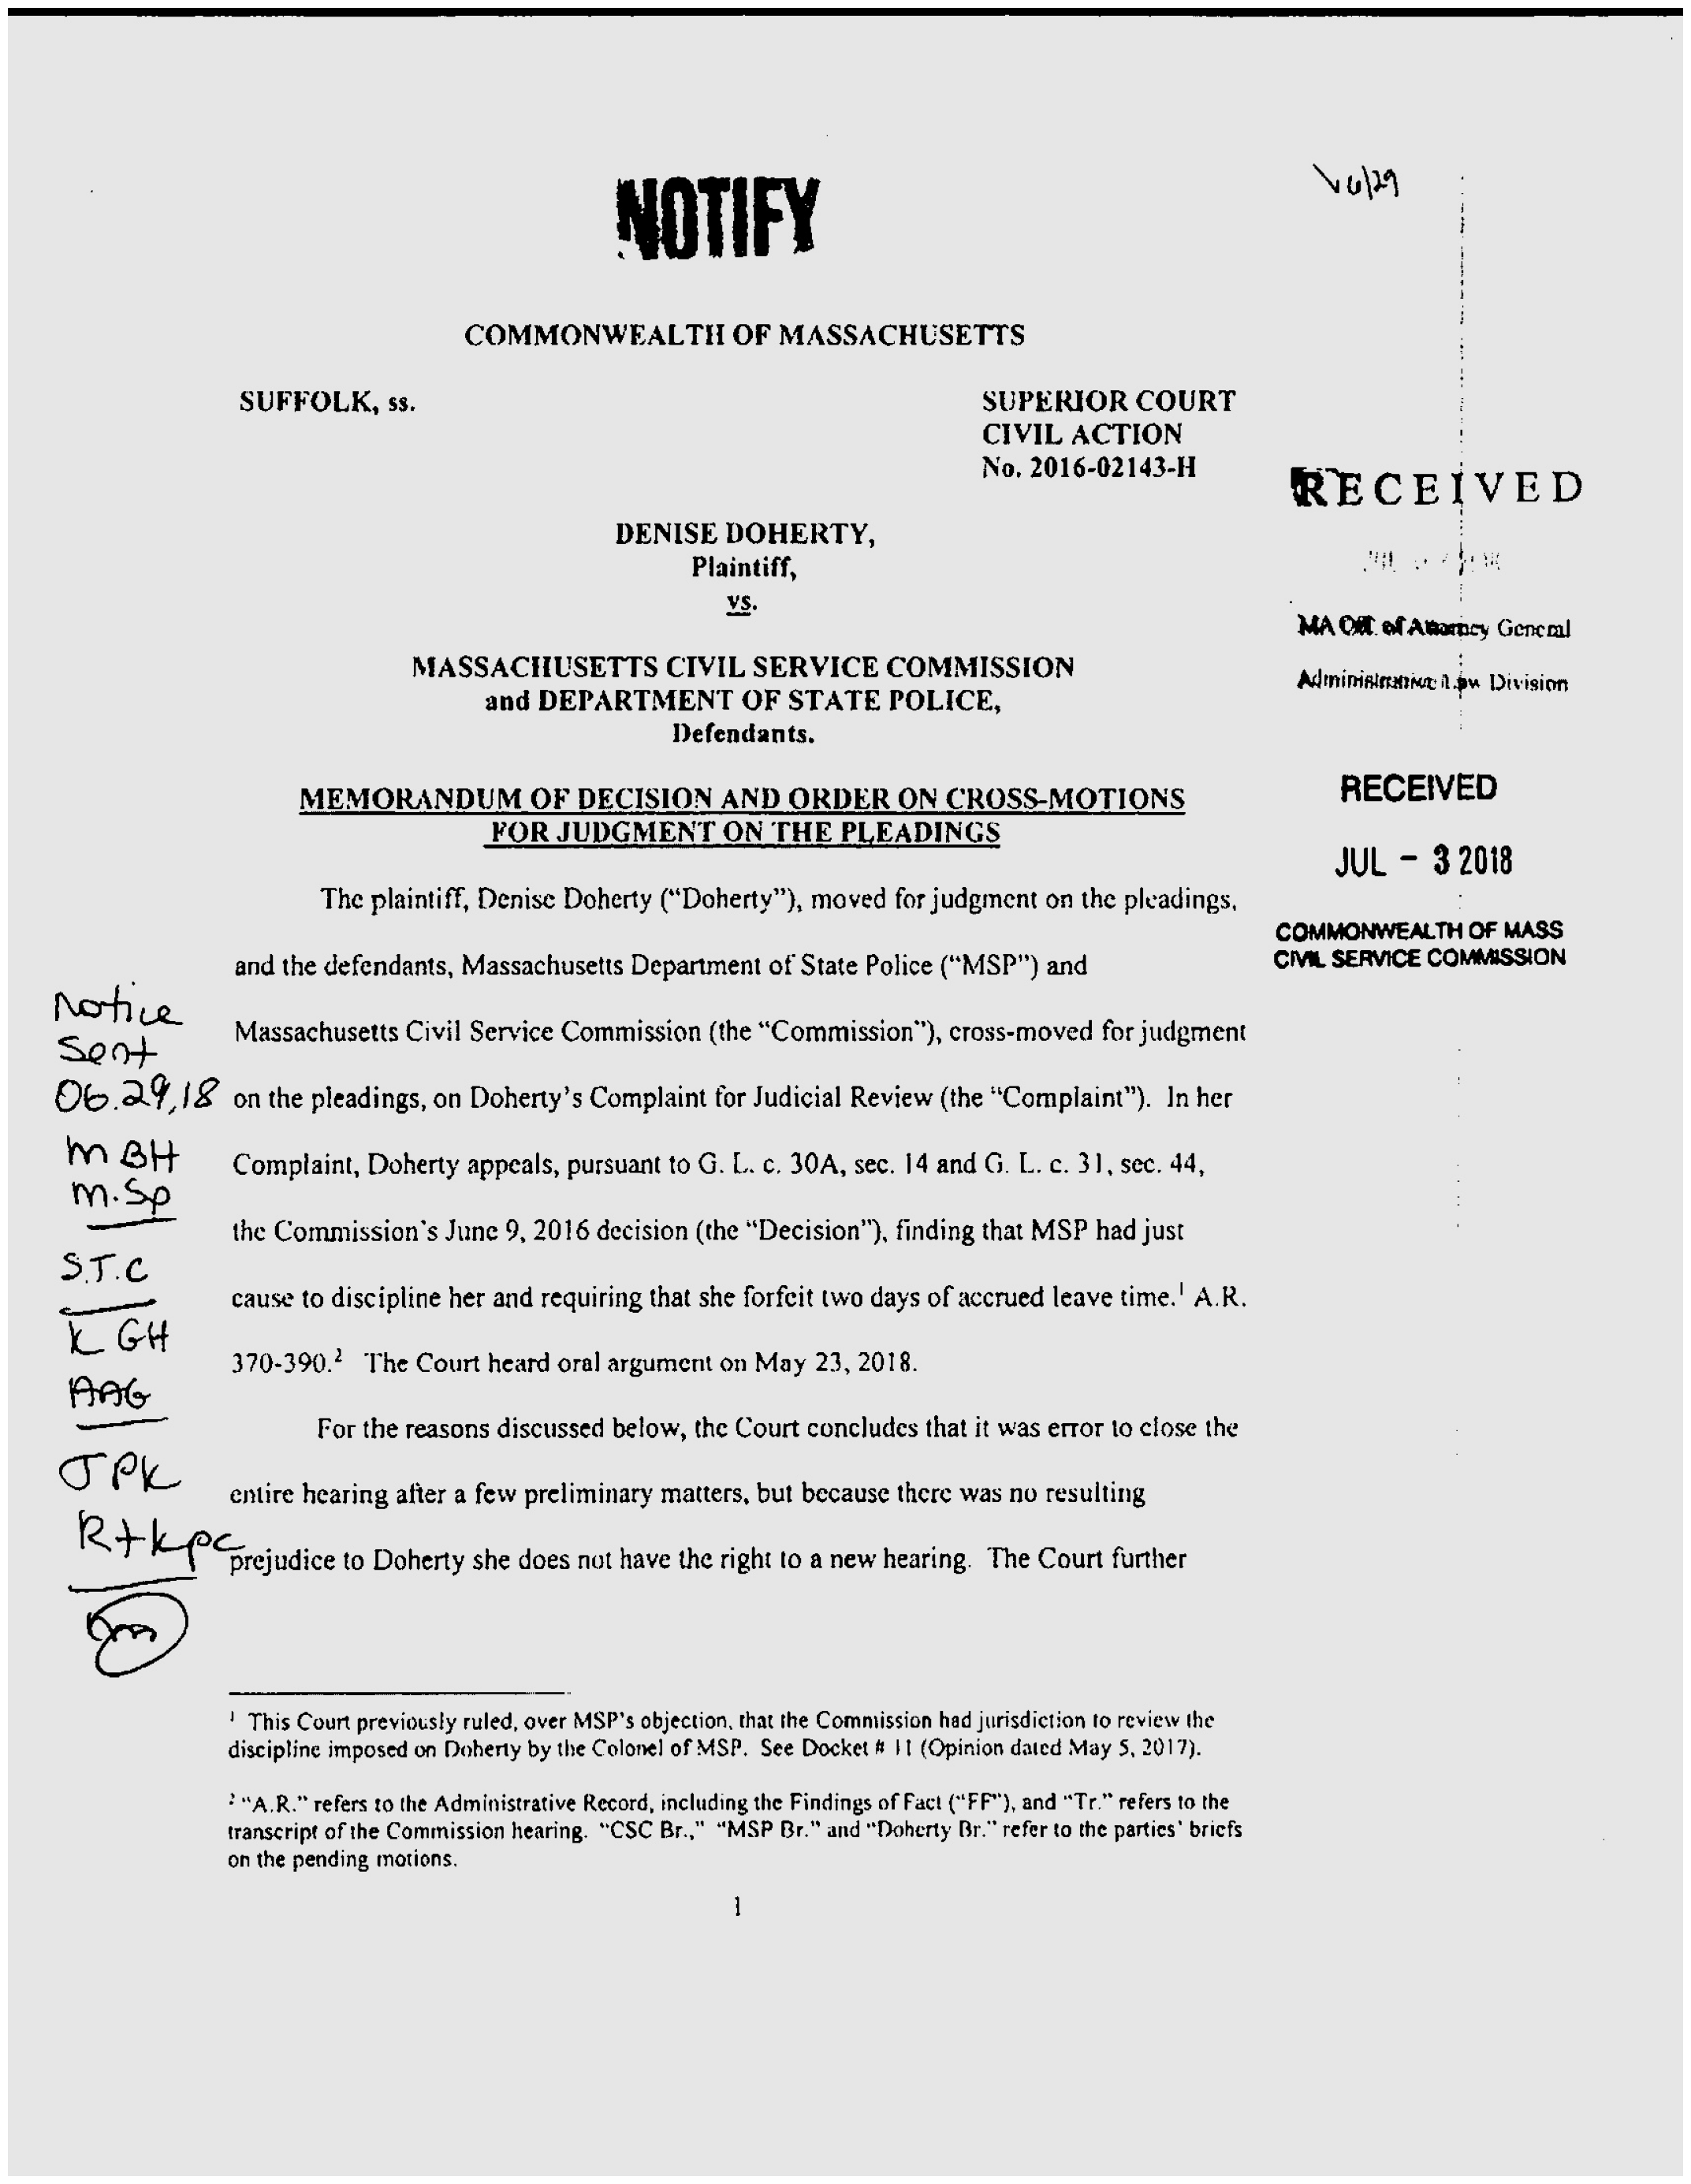

In [7]:
display("images/no_noise0.jpg")

In [8]:
# Dilation and Erosion
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [9]:
eroded_image = thin_font(no_noise)
cv2.imwrite("images/eroded_image0.jpg", eroded_image)

True

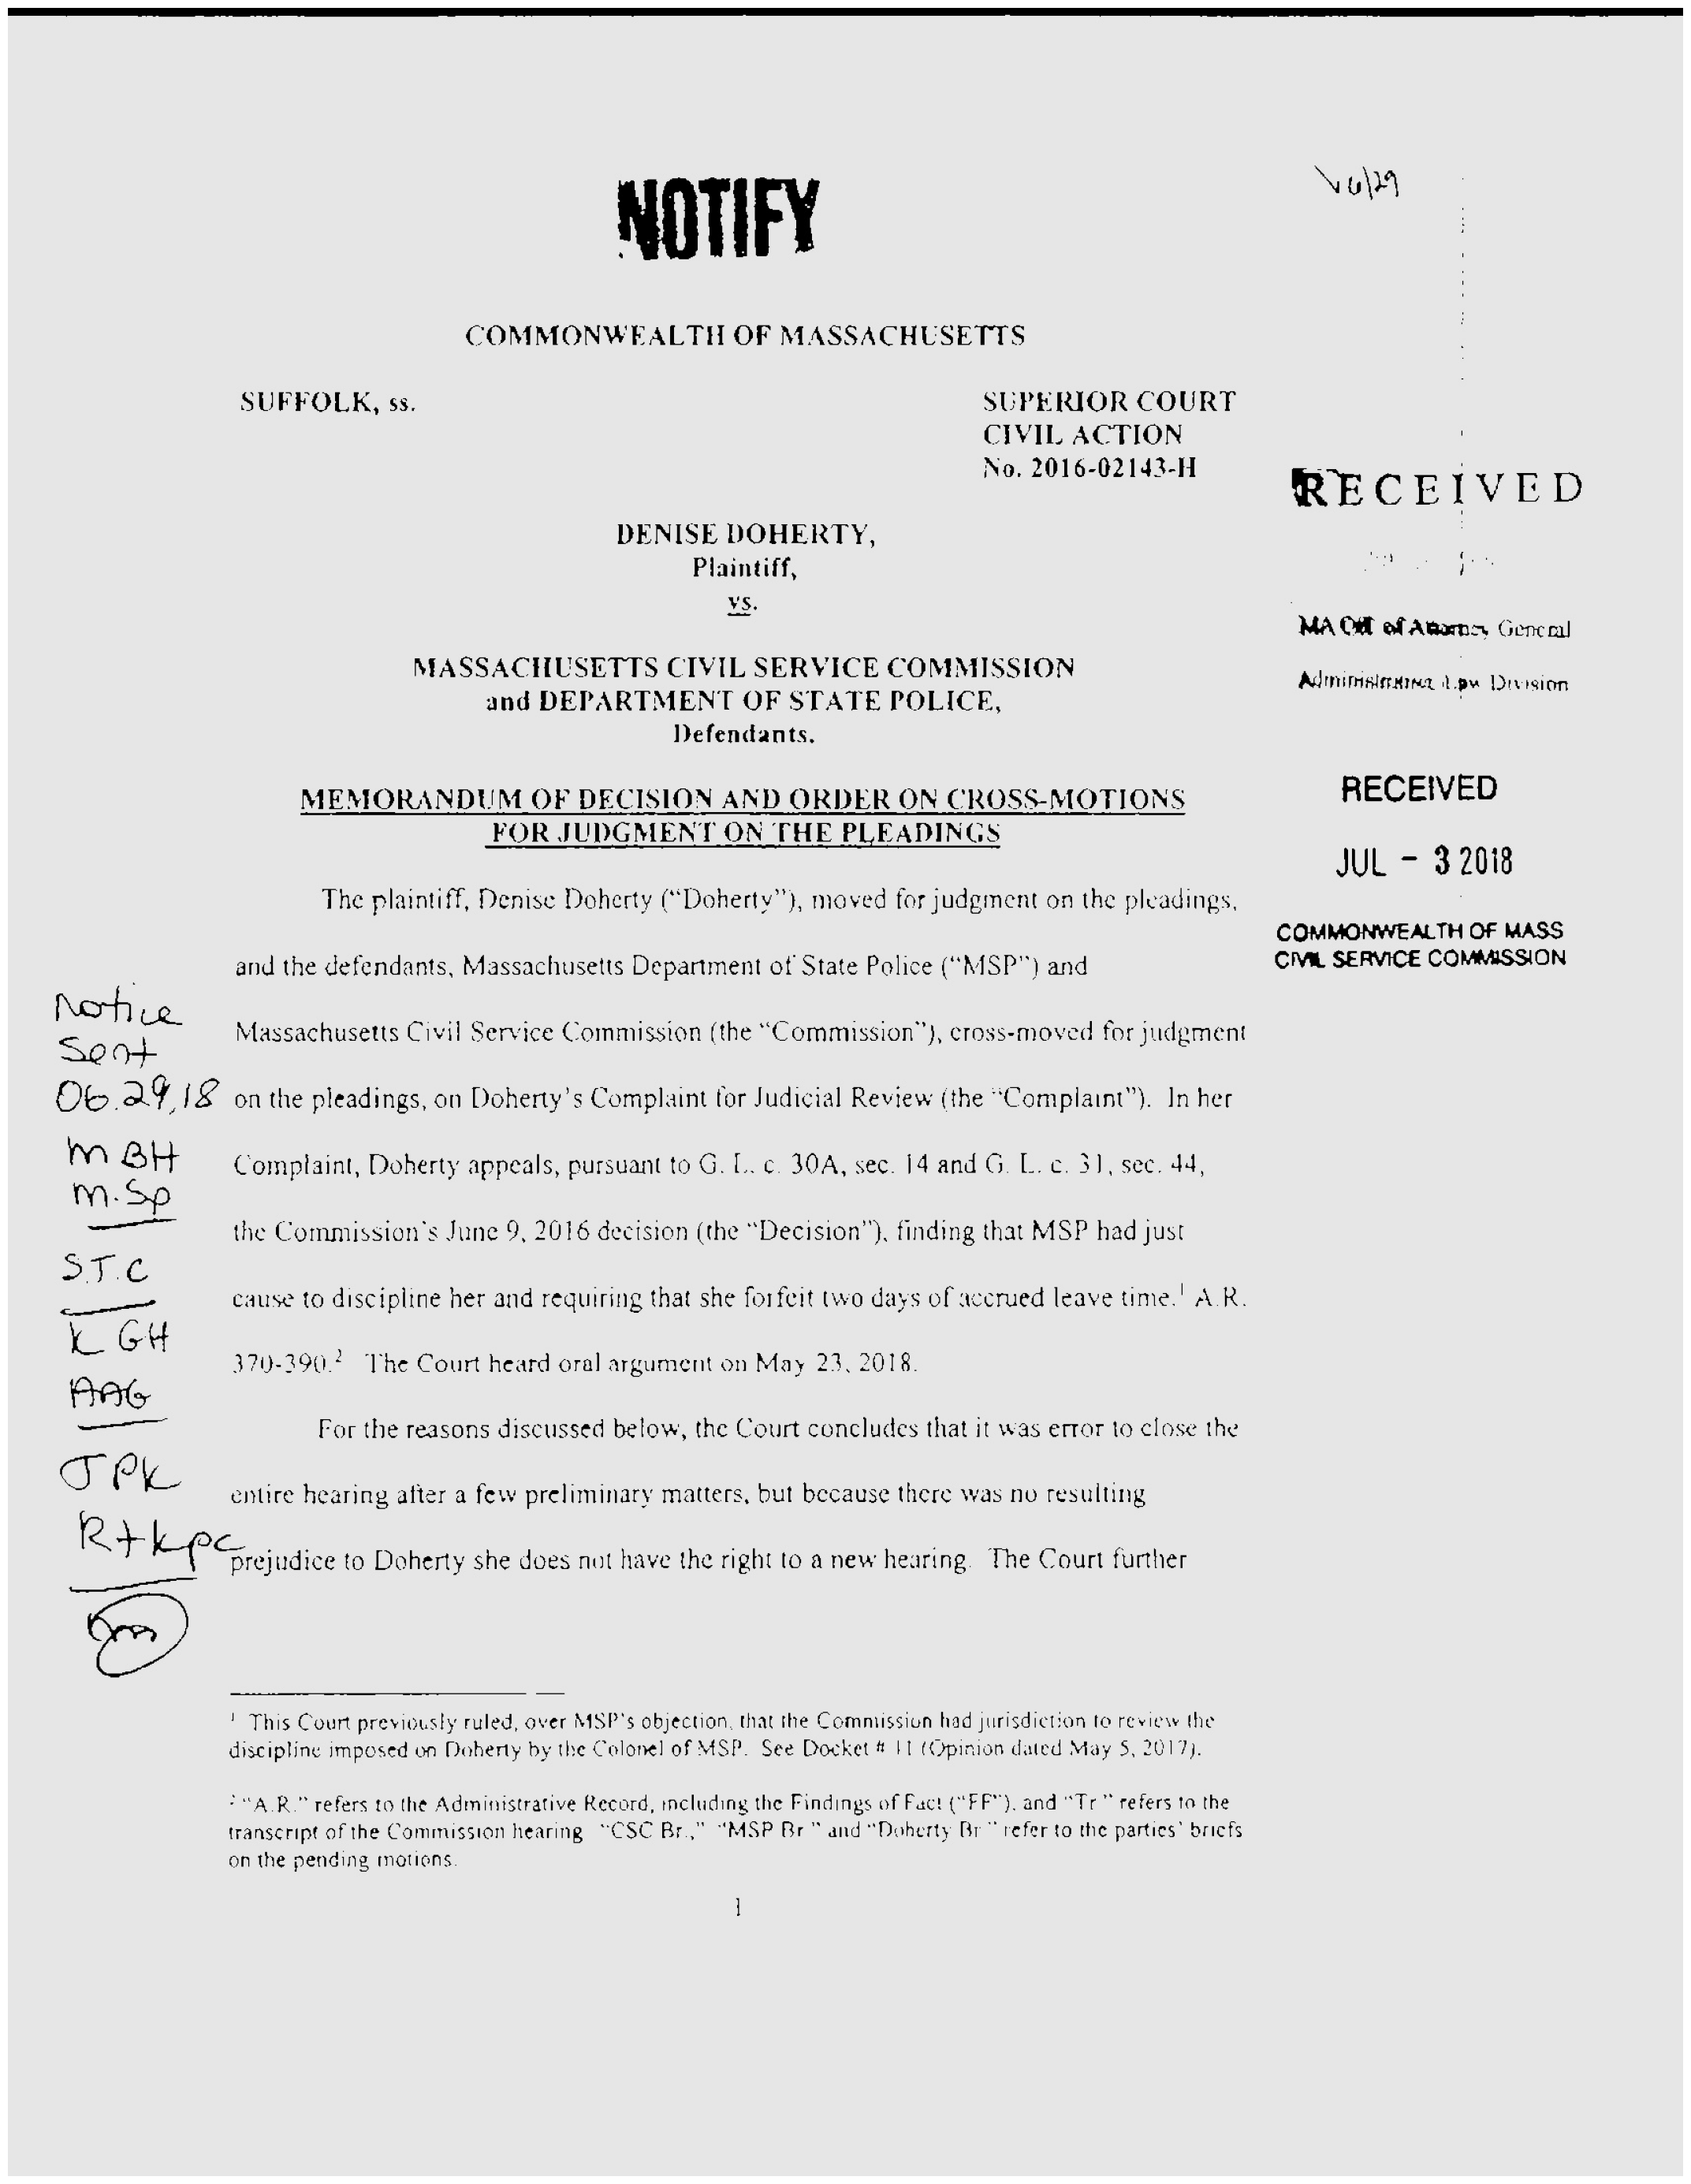

In [10]:
display("images/eroded_image0.jpg")

In [11]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [12]:
dilated_image = thick_font(no_noise)
cv2.imwrite("images/dilated_image0.jpg", dilated_image)

True

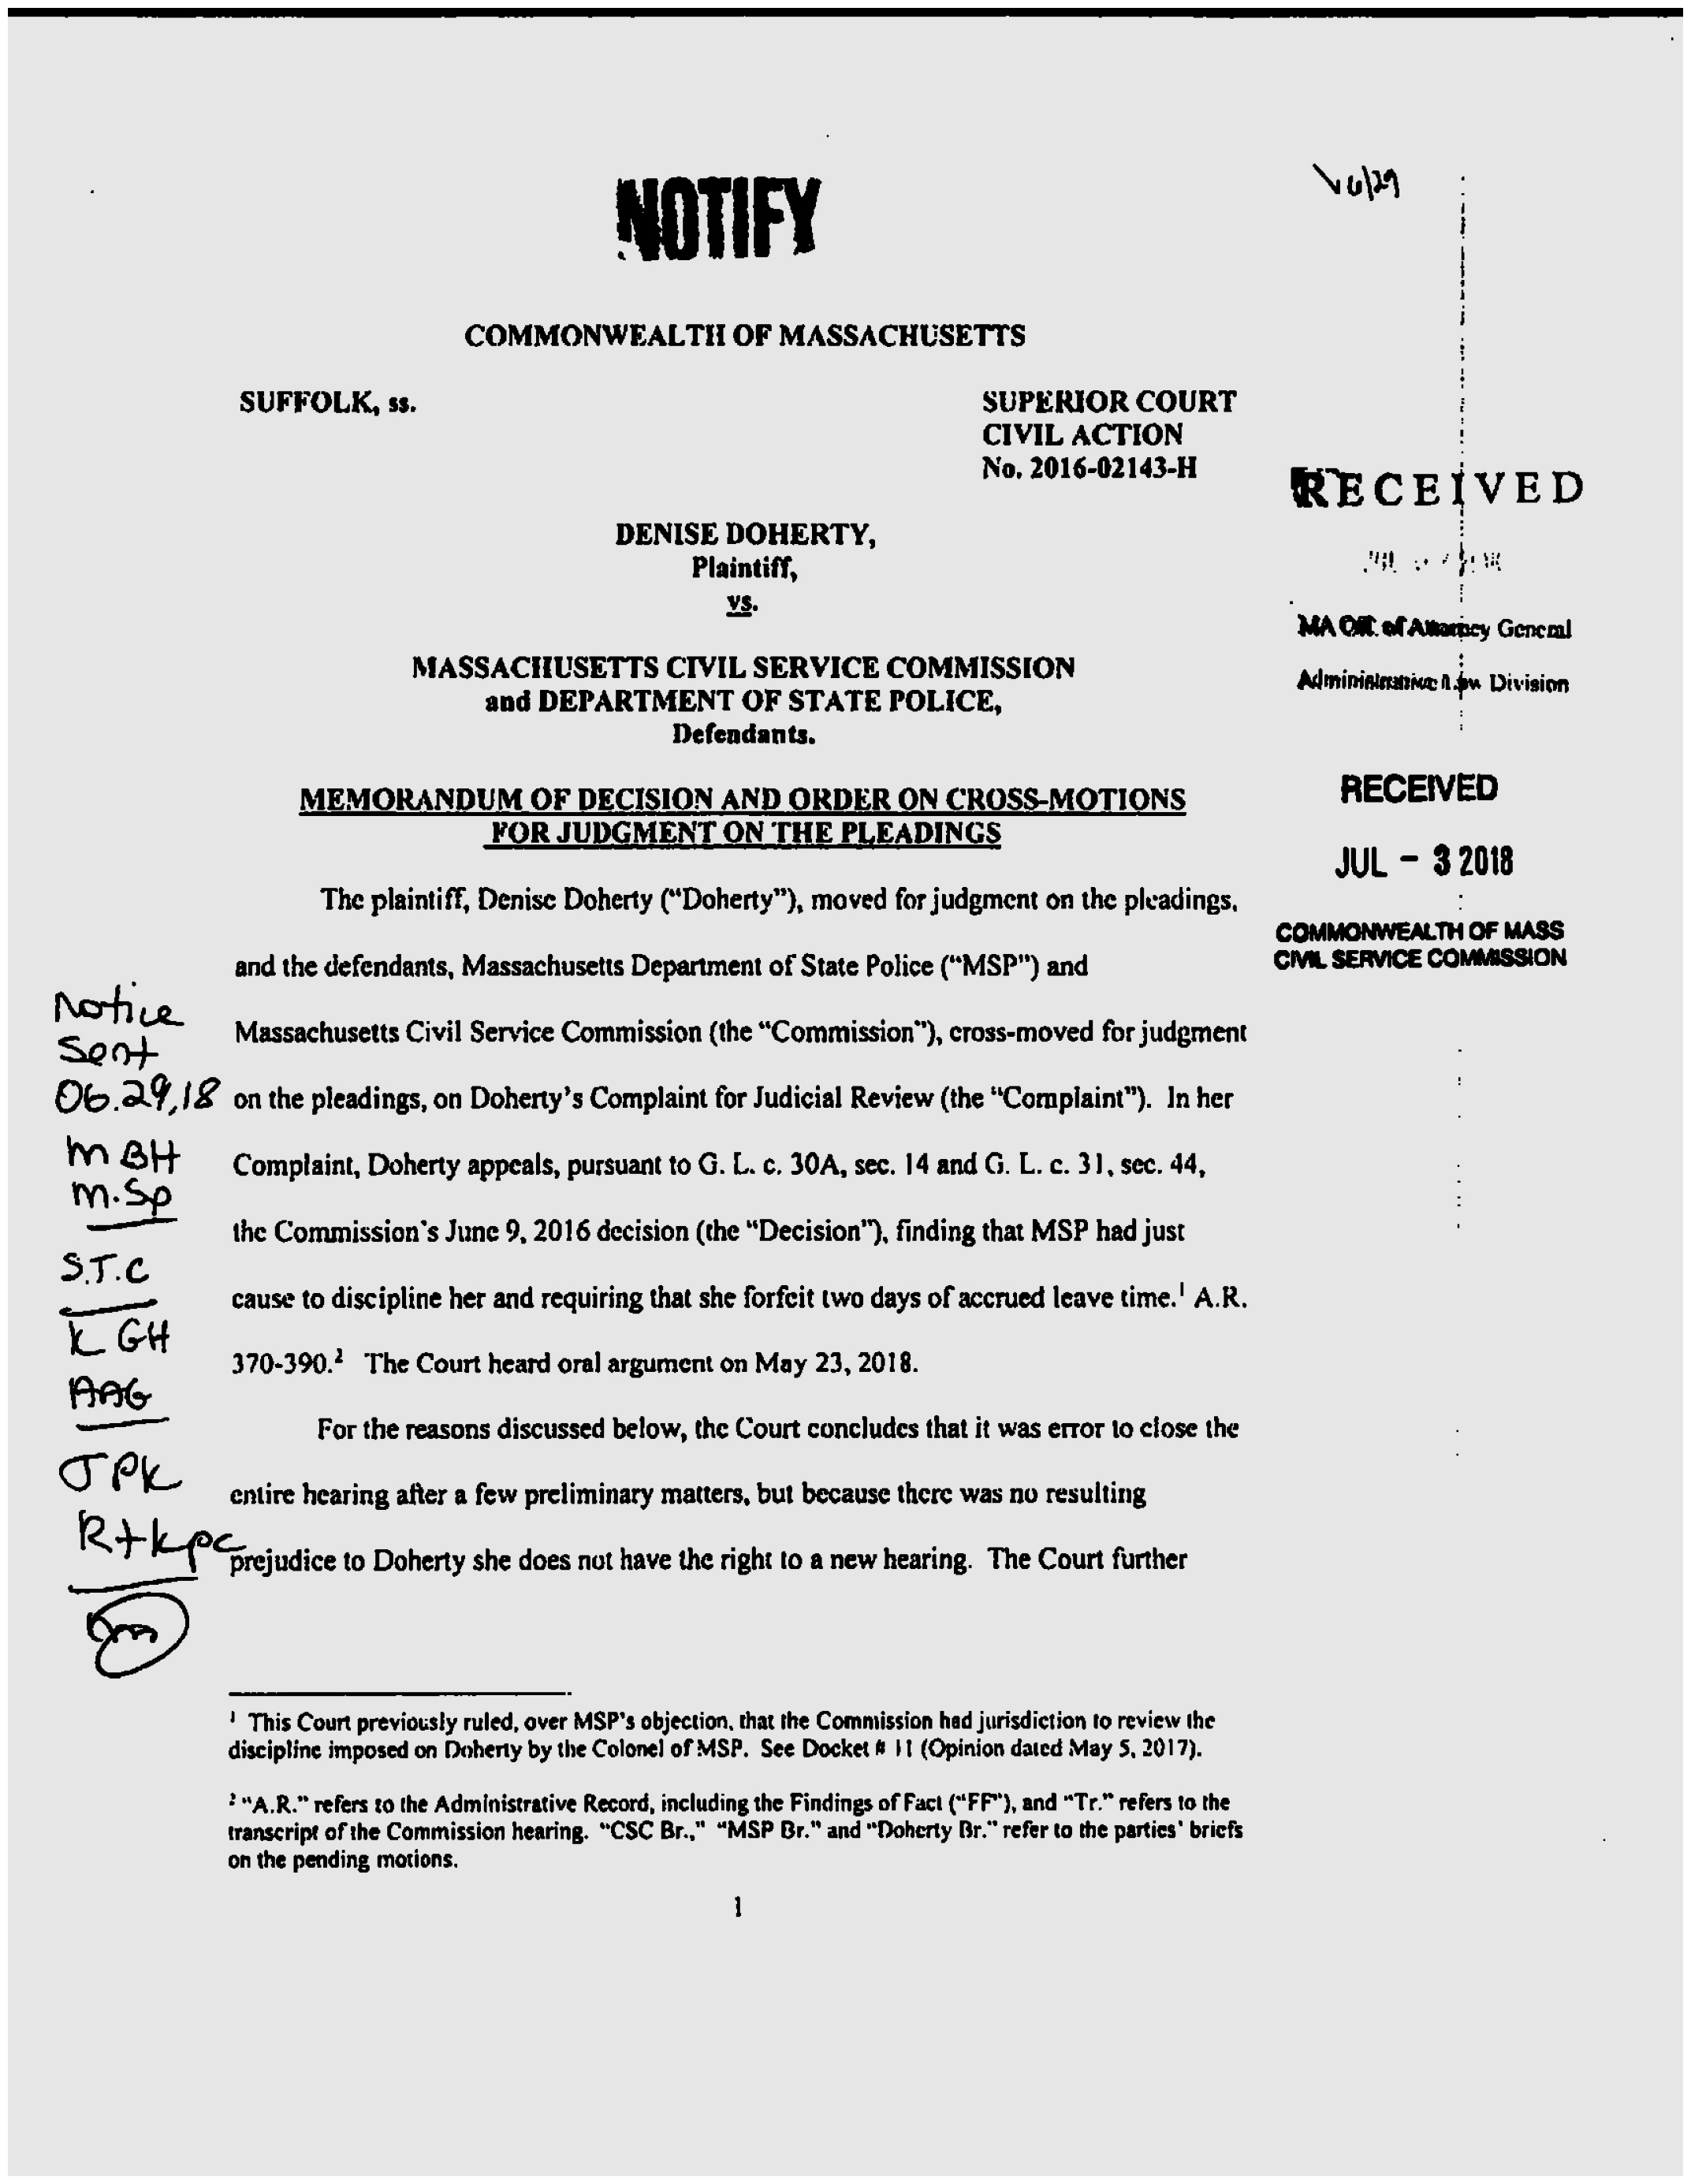

In [13]:
display("images/dilated_image0.jpg")

In [14]:
import pytesseract
import cv2

In [15]:
image = cv2.imread("images/0.jpg")


In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [17]:
cv2.imwrite("images/gray0.jpg", gray)

True

In [37]:
blur = cv2.GaussianBlur(gray, (15,15), 0)

In [38]:
cv2.imwrite("images/blur0.jpg", blur)

True

In [39]:
thresh = cv2.threshold(blur, 0 , 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [40]:
cv2.imwrite("images/thresh0.jpg", thresh)

True

In [42]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))

In [43]:
cv2.imwrite("images/kernal0.jpg", kernal)

True

In [80]:
dilate = cv2.dilate(thresh, kernal, iterations=5)

In [81]:
cv2.imwrite("images/dilate1.jpg", dilate)

True

In [82]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [83]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [84]:
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [85]:
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 300 and w > 50:
    # where to draw the actual bounding box
        cv2.rectangle(image, (x, y), (x+w, y+h), (36,255,12), 2)

In [86]:
cv2.imwrite("images/bbox4.jpg", image)

True